# **Applying Machine Learning Techniques to Housing Market Data**

**Objective**

You are provided with a real-world housing dataset, updated_house_data.csv. Your task is to choose one machine learning approach from the four listed below and apply it thoughtfully to the dataset:

– Regression

– Classification

– Clustering

– Dimensionality Reduction


**Instructions**
1. Explore the Dataset (EDA):

– Begin with a basic exploration of the dataset.

– Understand the structure, missing values, and feature types.

– Visualize where necessary (histograms, boxplots, scatterplots, etc.).

2. Select One of the Following Tasks:

**Option 1: Regression** -
Use machine learning to predict SalePrice using one selected feature.

– Choose any one numeric feature (e.g., LotArea, OverallQual, YearBuilt).

– Use SalePrice as your target.

– Apply at least one regression model (e.g., Linear Regression).

– Visualize the relationship between the selected feature and SalePrice.

**Option 2: Classification** -
Predict the SalePrice Category using one selected feature.

– Use SalePrice Category as your target (Cheap, Average Price, Expensive).

– Choose any one feature as your predictor.

– Apply at least one classification algorithm (e.g., Logistic Regression, Decision Tree).

– Evaluate using accuracy, confusion matrix, or F1 score.

**Option 3: Clustering** -
Group similar houses using unsupervised learning.

– Choose at least two meaningful features (e.g., LotArea, GrLivArea, OverallQual).

– Apply KMeans or another clustering method.

– Visualize clusters using scatter plots.

– Interpret what the clusters mean.

**Option 4: Dimensionality Reduction** -
Reduce the feature space and visualize patterns.

– Use multiple numerical features (minimum of 4).

– Apply PCA, t-SNE, or Isomap to reduce dimensions.

– Visualize results using scatter plots.

– Discuss patterns or separations you observe.

In [ ]:
#Import Python Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Exploratory Data Analysis (EDA)**

In [ ]:
#LOAD THE DATASET

house_data = pd.read_csv('/content/drive/MyDrive/updated_house_data.csv')

In [ ]:
#READ THE FIRST FEW ROWS OF THE DATASET

house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Expensive
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Average Price
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Expensive
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Average Price
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Expensive


In [ ]:
#VIEW THE LAST FEW ROWS

house_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,Average Price
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Expensive
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Expensive
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Average Price
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2008,WD,Normal,147500,Average Price


In [ ]:
#CHECK THE NUMBER OF ROWS AND COLUMNS

house_data.shape

(1460, 82)

In [ ]:
#CHECK THE DATA TYPE AND NULL-COUNTS INFO

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  BldgType            1460 non-null   object 
 16  HouseS

In [ ]:
#CHECK FOR THE SUMMARY STATISTICS OF THE DATASET

house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#LIST OUT THE COLUMNS

house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#CHECK FOR MISSING VALUES

house_data.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


# **VISUALIZATION**

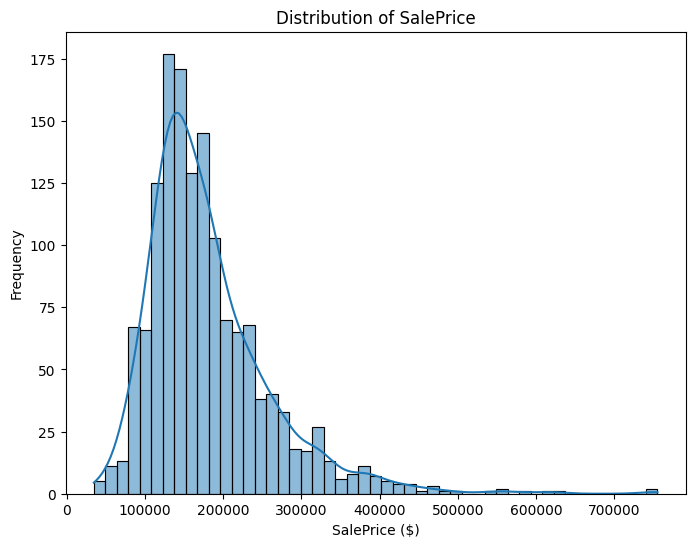

In [ ]:
#DISTRIBUTION OF SALES PRICE

plt.figure(figsize=(8, 6))
sns.histplot(house_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.show()

The histogram displays the distribution of Sales price across the dataset with a kernel density estimate (KDE) curve overlay. It is right-skewed with a peak around 100,000 - 200,000 and a long tail extending to 700,000 - 8000,000 showing that most prices are priced below 300,000 with few exceeding 500,000

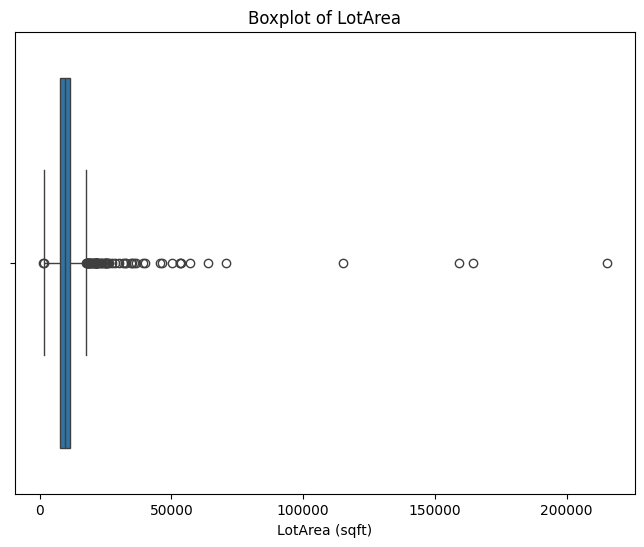

In [ ]:
#PLOT THE LOT AREA

plt.figure(figsize=(8, 6))
sns.boxplot(x=house_data['LotArea'])
plt.title('Boxplot of LotArea')
plt.xlabel('LotArea (sqft)')
plt.show()

This illustrates the distribution of LotArea, with the median around 9,500–10,000 sqft, interquartile range (IQR) likely spanning 7,500–11,500 sqft, and outliers extending beyond 20,000–50,000 sqft (some as high as 215,000 sqft). Whiskers indicate the non-outlier range, and dots represent extreme values.

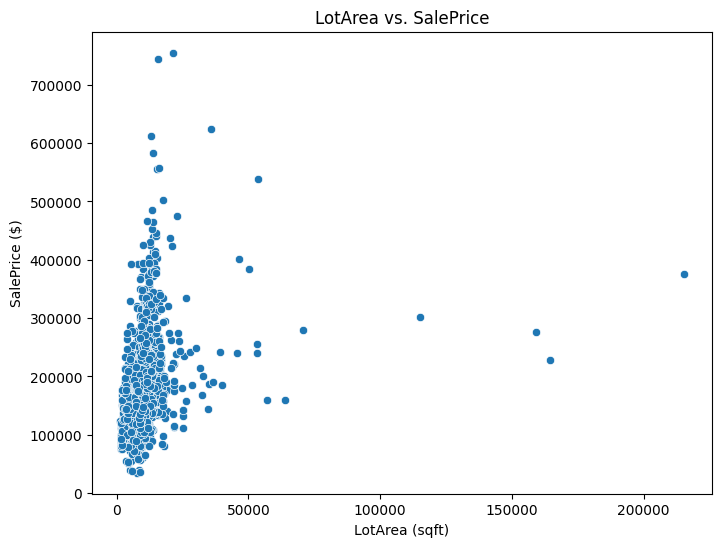

In [ ]:
#LOT AREA VS SALES PRICE

plt.figure(figsize=(8, 6))
sns.scatterplot(x=house_data['LotArea'], y=house_data['SalePrice'])
plt.title('LotArea vs. SalePrice')
plt.xlabel('LotArea (sqft)')
plt.ylabel('SalePrice ($)')
plt.show()

This displays LotArea (x-axis) against SalePrice (y-axis). Points show a weak positive trend: larger lots tend to have higher prices, but the relationship is noisy, with significant scatter. Most points cluster at LotArea < 20,000 sqft and SalePrice < $300,000, with outliers at high LotArea (e.g., >50,000 sqft) and varying prices.

# **REGRESSION MODEL**

In [ ]:
#IMPORT REGRESSION LIBRARIES

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#SELECT FEATURE AND TARGET

X = house_data[['OverallQual']]  #Feature X
y = house_data['SalePrice']      #Target y

In [ ]:
#SPLIT DATA INTO TRAIN AND TEST SETS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#INITIALIZE AND TRAIN THE LINEAR REGRESSION MODEL

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#MAKE PREDICTIONS ON THE TEST SET

y_pred = model.predict(X_test)

In [ ]:
#EVALUATE THE MODEL

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2681026163.51
R-squared: 0.65


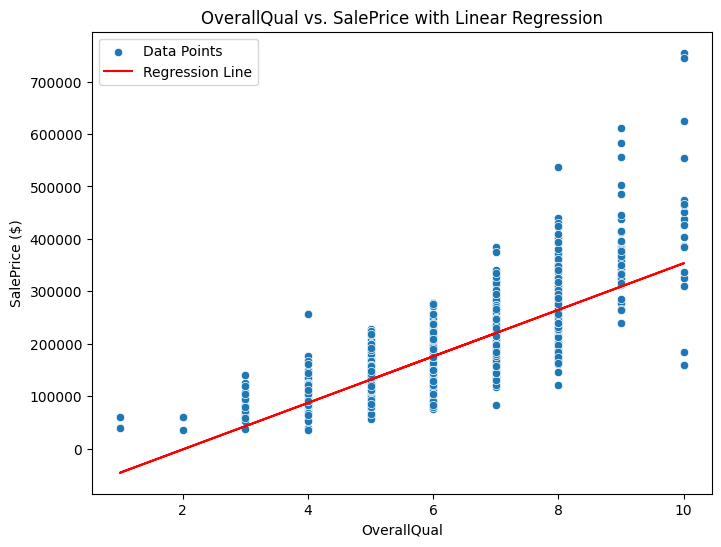

In [ ]:
#VISUALIZE THE REGRESSION LINE

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['OverallQual'], y=y, label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('OverallQual vs. SalePrice with Linear Regression')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice ($)')
plt.legend()
plt.show()

The Linear Regression model using OverallQual effectively predicts SalePrice, with an R-squared of 0.65 indicating that 65% of the variance is explained. The RMSE of $51,779 suggests moderate predictive accuracy, suitable for a single-feature model. The scatterplot and regression line confirm a strong positive relationship, with higher-quality homes commanding higher prices.

# **Link to Report** - https://drive.google.com/file/d/1HQCEwzsRywclpMuAHbR-IsWHnlqu7usV/view?usp=sharing